In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from bs4 import BeautifulSoup
import requests
import re
import seaborn as sns



In [3]:
# Load in a Kaggle data set with attributes and MSRP for cars

MSRP = pd.read_csv('data.csv')
print(MSRP.shape)

(11914, 16)


In [4]:
print(MSRP.columns)
MSRP

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [5]:
# Web scraping to get the countries of origin for the different listed car brands

url = 'https://www.canstarblue.com.au/vehicles/car-country-of-origin/'

response = requests.get(url)
if response.status_code == 200:
    soup = BeautifulSoup(response.content, 'html.parser')
else:
    print("Failed to retrieve the page. Status code:", response.status_code)

table = soup.find('h2', text='Car Brands – Country of Origin').find_next('table')

data = []
for row in table.find_all('tr')[1:]:
    columns = row.find_all('td')
    row_data = [col.get_text(strip=True) for col in columns]
    data.append(row_data)

df = pd.DataFrame(data, columns=['Car Brand', 'Country of Origin'])
df

/var/folders/m7/2wbj3vkn03d65h0jqbt8t86w0000gn/T/ipykernel_91824/2001653966.py:11: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  table = soup.find('h2', text='Car Brands – Country of Origin').find_next('table')


,Car Brand,Country of Origin
0,Abarth,Italy
1,Alfa Romeo,Italy
2,Aston Martin,England
3,Audi,Germany
4,Bentley,England
5,BMW,Germany
6,Bugatti,France
7,Cadillac,America
8,Caterham,England
9,Chery,China


In [6]:
merged_df = pd.merge(MSRP, df, how='left', left_on='Make', right_on='Car Brand')
merged_df.to_csv('merged_df', index = False)
merged_df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Car Brand,Country of Origin
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135,BMW,Germany
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650,BMW,Germany
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350,BMW,Germany
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450,BMW,Germany
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500,BMW,Germany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120,NaN,NaN
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670,NaN,NaN
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620,NaN,NaN
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920,NaN,NaN


In [7]:
merged_df['MSRP'] = pd.to_numeric(merged_df['MSRP'], errors='coerce')

min_price = merged_df['MSRP'].min()
max_price = merged_df['MSRP'].max()
avg_price = merged_df['MSRP'].mean()

print(f"The minimum price in the merged data is: {min_price}")
print(f"The maximum price in the merged data is: {max_price}")
print(f"The average price in the merged data is: {avg_price}")

The minimum price in the merged data is: 2000
The maximum price in the merged data is: 2065902
The average price in the merged data is: 40594.737032063116


Before I started going into my graphs, I wanted to understand my data a bit more, so I calculated some basic statistics: 

The minimum price in the merged data is: 2000
The maximum price in the merged data is: 2065902
The average price in the merged data is: 40594.737032063116

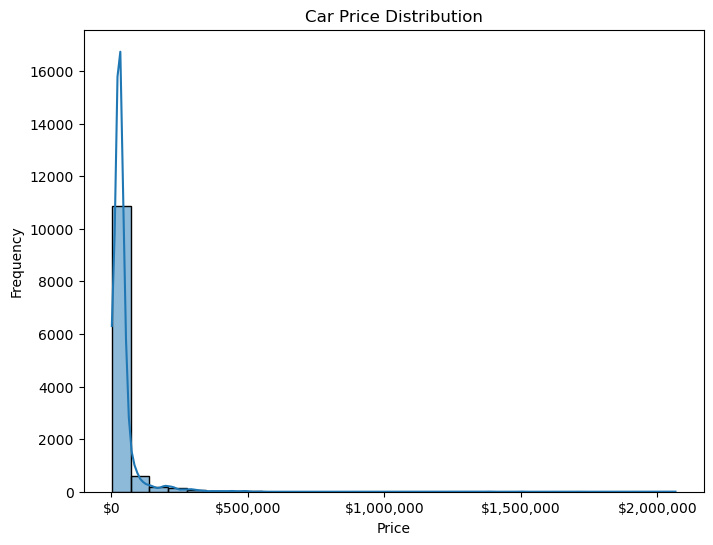

In [8]:
# Question 1: Car Price Distribution
plt.figure(figsize = (8, 6))
#sns.scatterplot(data = merged_df, x='MSRP')
sns.histplot(merged_df['MSRP'], bins = 30, kde = True)
plt.title('Car Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

formatter = ticker.FuncFormatter(lambda x, _: f'${x:,.0f}')  # Modify the format here as needed
plt.gca().xaxis.set_major_formatter(formatter)

plt.show()

The goal of this graph was to show the distribution of car prices. The maximum car price is over 2 million, which could be an outlier and distort our data. I tried making anotehr graph but excluding prices above 500,000 to see the distribution of the prices where majority of them are.  The data still was largely right skewed, so I took it down to 300,000. Most of the data for car price's is below 50,000.

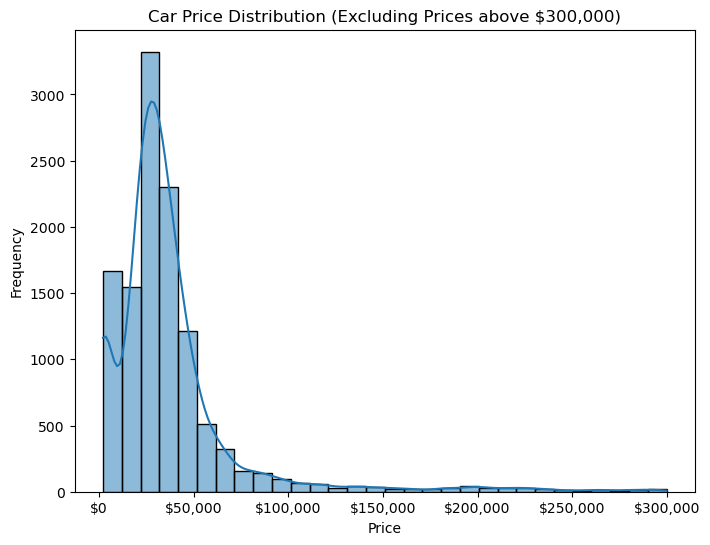

In [9]:
plt.figure(figsize = (8, 6))
filtered_prices = merged_df[merged_df['MSRP'] <= 300000]['MSRP']
sns.histplot(filtered_prices, bins = 30, kde = True)
plt.title('Car Price Distribution (Excluding Prices above $300,000)')
plt.xlabel('Price')
plt.ylabel('Frequency')

formatter = ticker.FuncFormatter(lambda x, _: f'${x:,.0f}')  # Modify the format here as needed
plt.gca().xaxis.set_major_formatter(formatter)

plt.show()

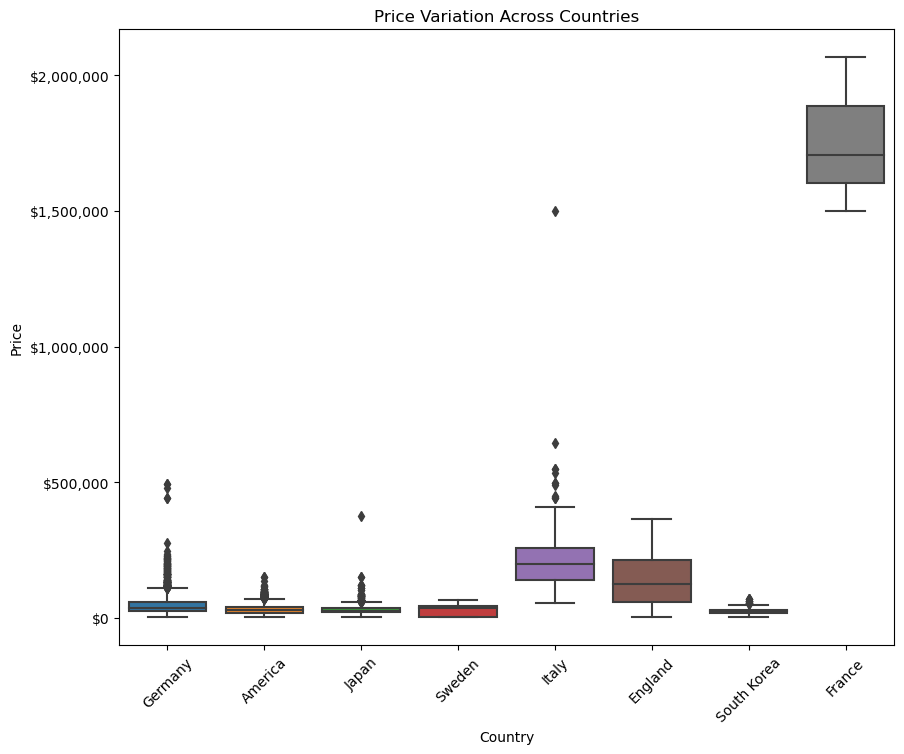

In [10]:
# Question 2: Price Variation Across Countries
plt.figure(figsize = (10, 8))
sns.boxplot(data = merged_df, x = 'Country of Origin', y = 'MSRP')
plt.title('Price Variation Across Countries')
plt.xlabel('Country')
plt.ylabel('Price')
plt.xticks(rotation=45)

formatter = ticker.FuncFormatter(lambda x, _: f'${x:,.0f}')  # Modify the format here as needed
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

It was interesting to see how much higher the prices in France were compared to the other countries. I assumed, that it was just because there are majorly higher prices in France. But this lead me to another question (question 6) seen below... wanting to count the number of car brands from each country. 

##### See graph below

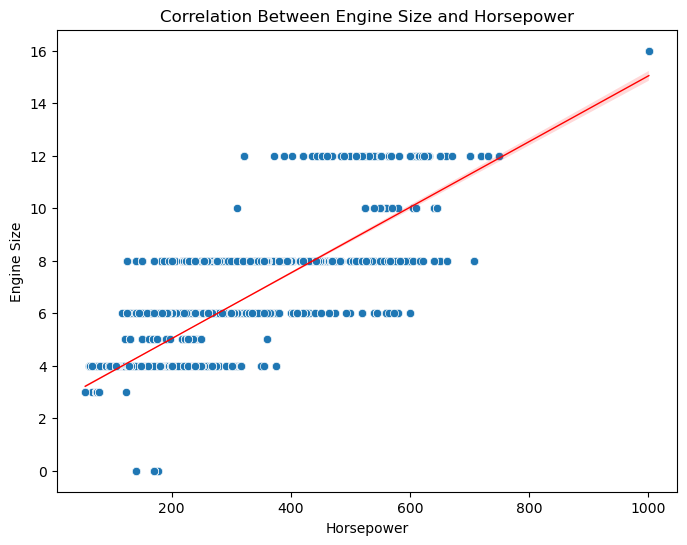

In [11]:
# Question 3: Correlation Between Engine Size and Horsepower
plt.figure(figsize = (8, 6))
sns.scatterplot(data = merged_df, x = 'Engine HP', y = 'Engine Cylinders')
sns.regplot(data=merged_df, x='Engine HP', y='Engine Cylinders', scatter=False, color='red', line_kws={'linewidth': 1})
plt.title('Correlation Between Engine Size and Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('Engine Size')
plt.show()

This graph makes sense, as the engine size increases, the horse power on average increases too. However, I didn't think that this scatter plot was the best way to view the data, so I tried to view this question data again but in boxplots to see if it helps the interpretability of it. 

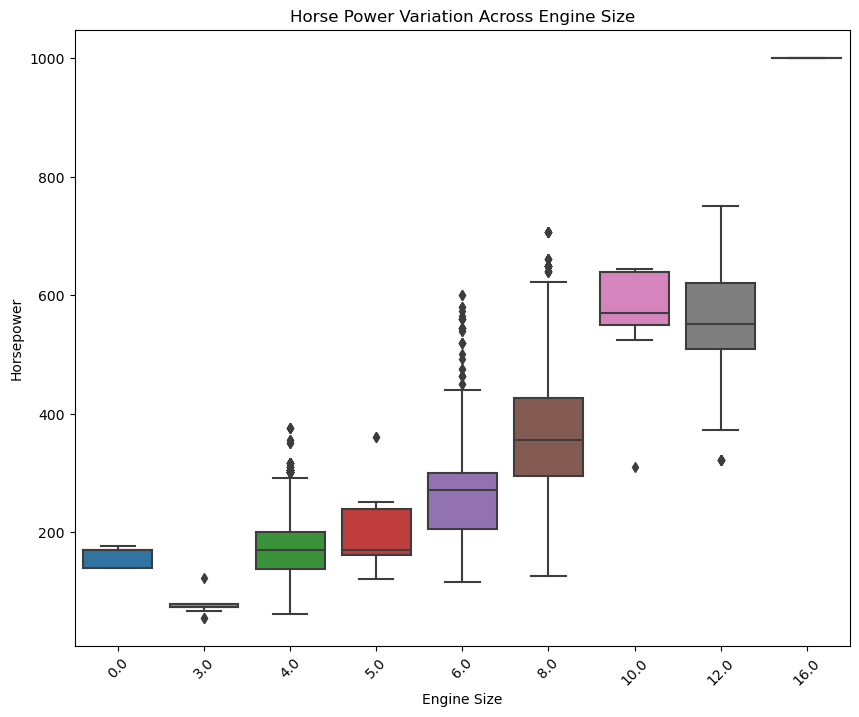

In [12]:
plt.figure(figsize = (10, 8))
sns.boxplot(data = merged_df, x = 'Engine Cylinders', y = 'Engine HP')
plt.title('Horse Power Variation Across Engine Size')
plt.xlabel('Engine Size')
plt.ylabel('Horsepower')
plt.xticks(rotation=45)
plt.show()


These boxplots for engine size and horsepower make more sense to me than the boxplots do. You can clearly see that as the engine size increases, the average horsepower also increases (except for 3 and 10 engine cylinders). The maximum horsepowers are a bit more volatile and not as consistent of an increase, but that makes sense because you may have some random car models or types with a certain engine size that are made to have a better horsepower.

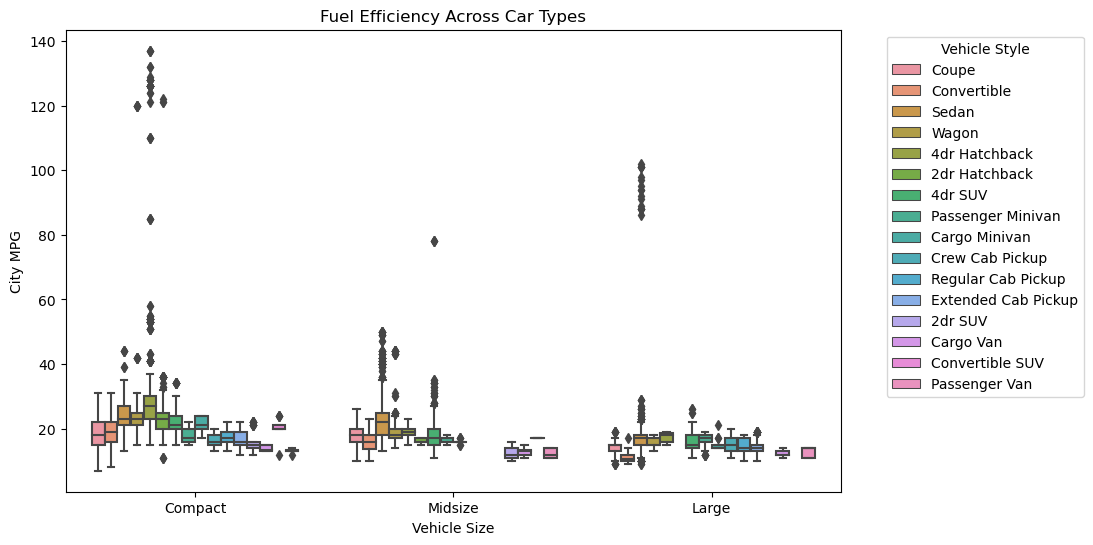

In [13]:
# Question 4: Fuel Efficiency Analysis
plt.figure(figsize = (10, 6))
sns.boxplot(data = merged_df, x = 'Vehicle Size', y = 'city mpg', hue = 'Vehicle Style')
plt.title('Fuel Efficiency Across Car Types')
plt.xlabel('Vehicle Size')
plt.ylabel('City MPG')
plt.legend(title = 'Vehicle Style', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

I don't this graph is super helpful because there is too much data and it is too busy. But I think it was helpful to see that there's not a significant difference in the city MPG as the vehicle size changes. There are some lower and some higher gas mileage for each vehicle size. There are some very high outliers for the compact vehicle size, and that makes sense because there may be some random small cars that meet that criteria. This is good information, but it teaches us that vehicle size isn't the only reason you should choose a certain type of car if you are looking for a good gas mileage.

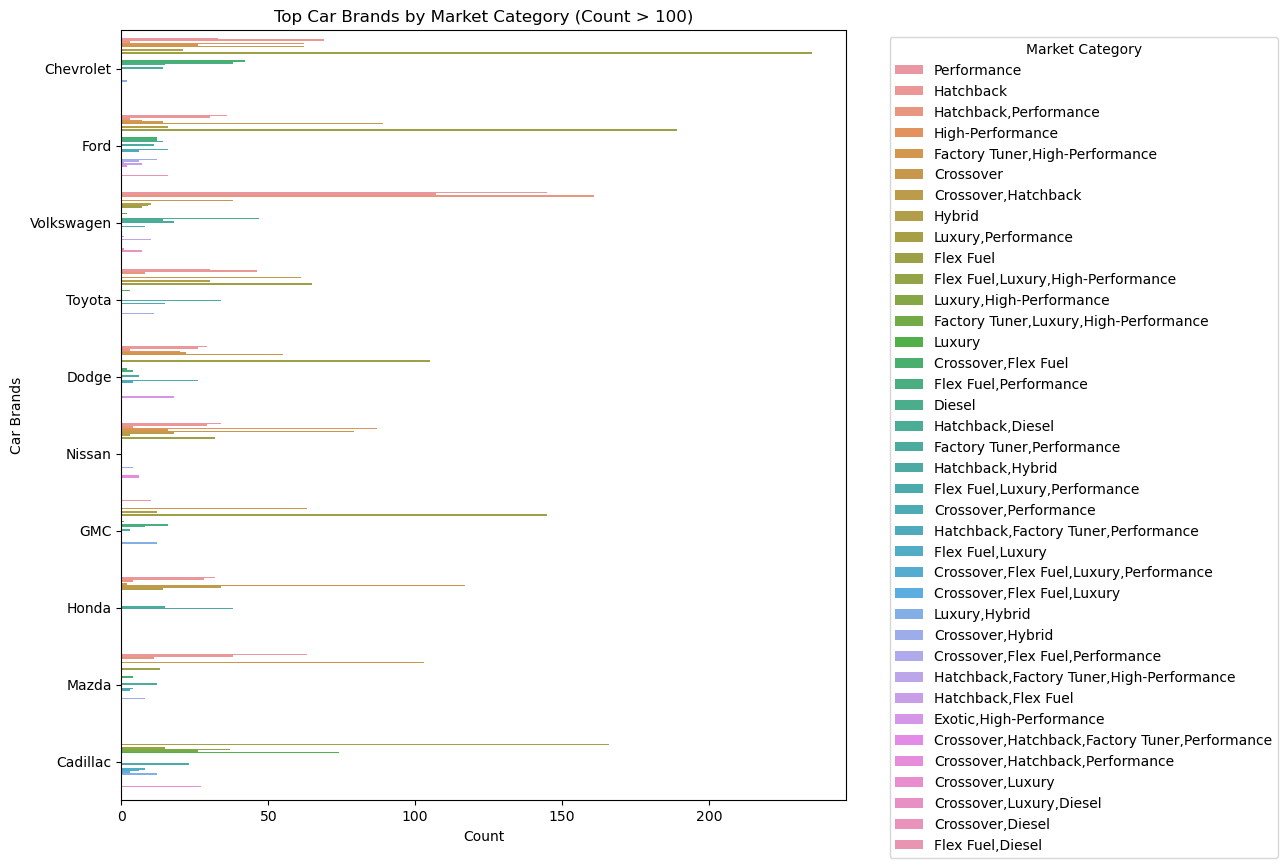

In [14]:
# Question 5: Market Popularity Trends
# Filtered to show where the counts are greater than 100 because the data is not readable
top_brands = merged_df['Make'].value_counts()
top_brands = top_brands[top_brands > 50].index[:10]

plt.figure(figsize=(10, 10))
sns.countplot(data=merged_df[merged_df['Make'].isin(top_brands)], y='Make', hue='Market Category', order=top_brands)
plt.title('Top Car Brands by Market Category (Count > 100)')
plt.xlabel('Count')
plt.ylabel('Car Brands')
plt.legend(title='Market Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.subplots_adjust(right=0.85)  # Adjust the right margin
plt.show()


I had a hard time making a good visualization for this because there are so many car brands and market categories, so every visualizaton I made looked too busy. But one good thing this shows us is how there are some car brands that make more market categories. Like Chevrolet has more lines than Cadillac does. Some brands have a greater variety of products. 

In [15]:
# (Additional Questions) Question 6: Country of Origin Models
country_counts = merged_df['Country of Origin'].value_counts()

country_model_count = pd.DataFrame(country_counts)
country_model_count.columns = ['Amount of Car Models']
country_model_count.index.name = 'Country of Origin'

print(country_model_count)

                   Amount of Car Models
Country of Origin                      
Japan                              3528
America                            3232
Germany                            1960
South Korea                         537
Sweden                              392
England                             344
Italy                               184
France                                3


This is the follow up from Question 2 looking at the price distribution by country of origin. Japan, America, and Germany by far have the highest amount of car models, whereas France only has 3. From the graph in question 2, we see that France has the highest price, and this table helps us conclude that this high price comes from a few amount of car models that must all be a very expensive car. There are some slightly higher prices in Japan, and America, but nothing compared to France's. These countries' price distribution is smaller than France's, and there are also significantly more car models so it shows there is not a super big variety in that. 

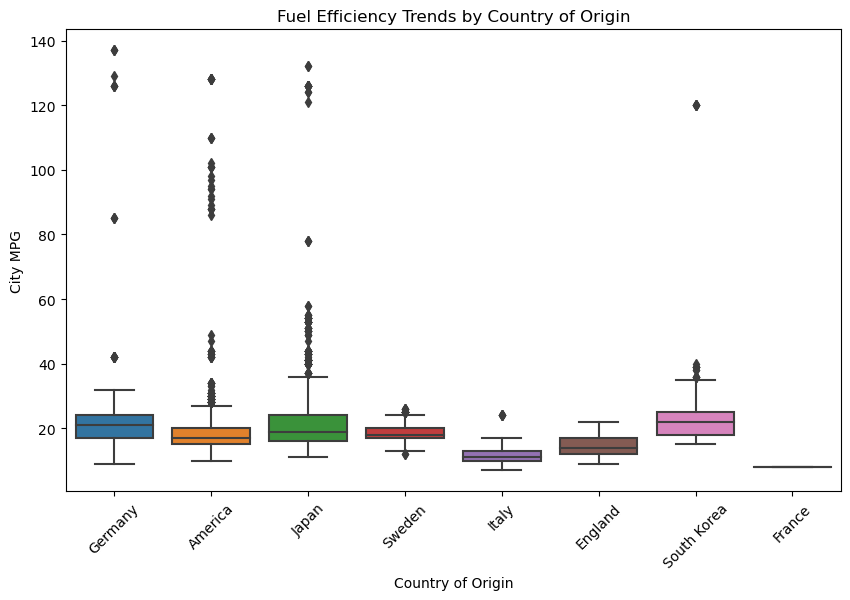

In [16]:
# (Additional Questions) Question 7: Fuel Efficiency Trends

plt.figure(figsize = (10, 6))
sns.boxplot(data = merged_df, x = 'Country of Origin', y = 'city mpg')
plt.title('Fuel Efficiency Trends by Country of Origin')
plt.xlabel('Country of Origin')
plt.ylabel('City MPG')
plt.xticks(rotation = 45)
plt.show()


This was something I became interested in viewing, but there aren't significant trends to pull from this data as the average city MPG doesn't change drastically across the countries. An interesting thing to note though, especially after the previous table about how there are many more models in Japan, America, and Germany, is seeing how there are more outliers for these countries of having a higher gas mileage. There are more car models which brings a need for some models and types to be better than others, so they have to have a higher gas mileage to get any traction for customers. 

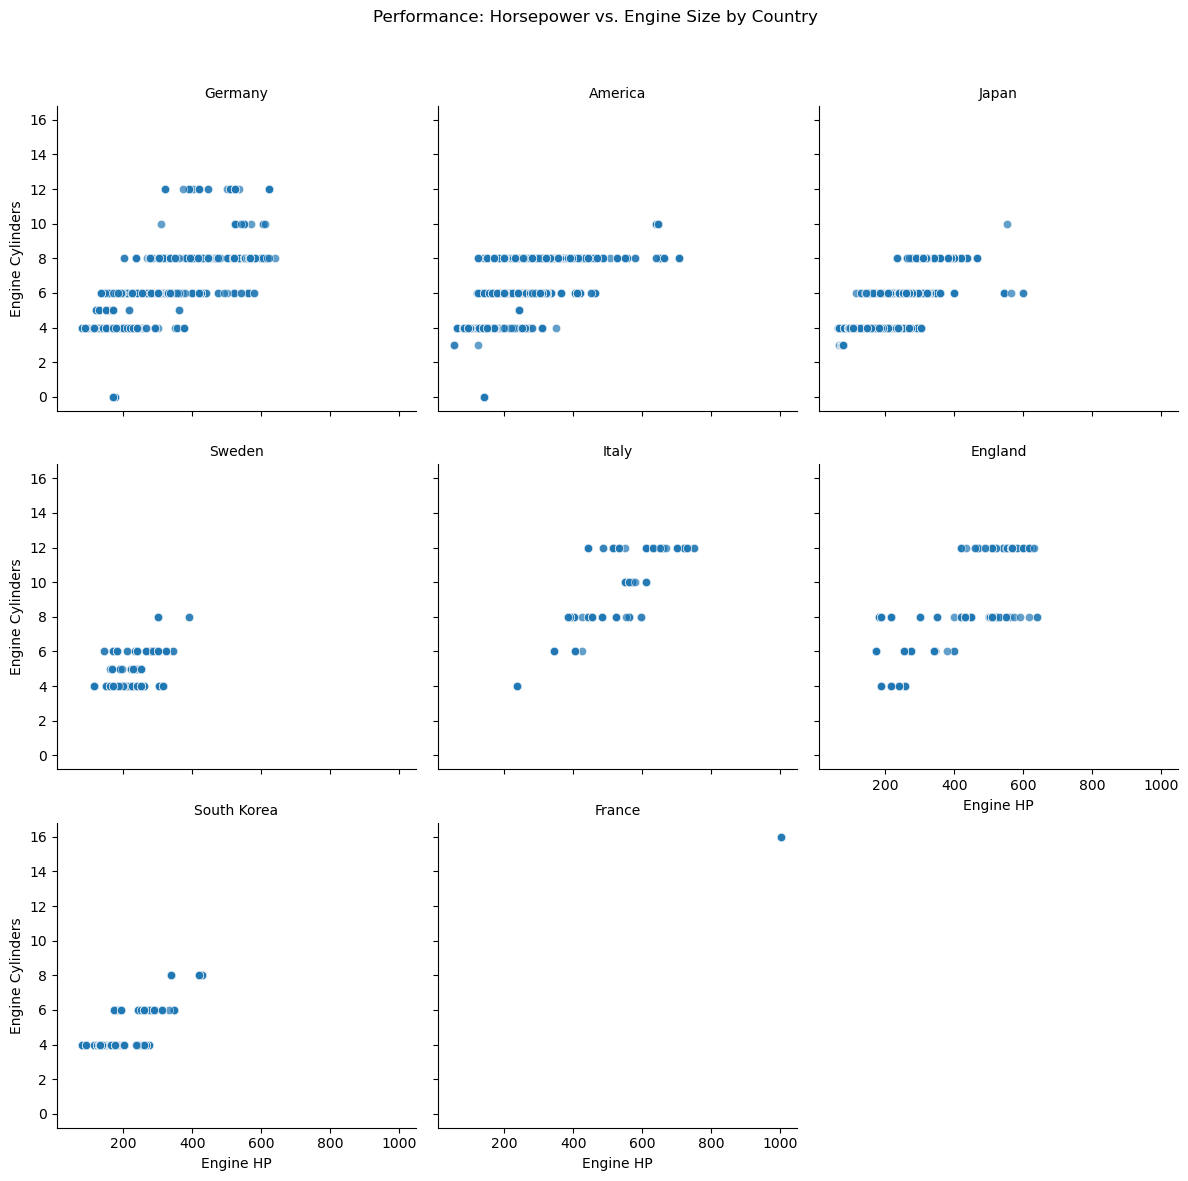

In [17]:
# (Additional Questions) Question 8: Performance vs. Country of Origin

g = sns.FacetGrid(merged_df, col = 'Country of Origin', col_wrap = 3, height = 4)
g.map(sns.scatterplot, 'Engine HP', 'Engine Cylinders', alpha = 0.7)
g.set_titles('{col_name}')
plt.subplots_adjust(top = 0.9)
g.fig.suptitle('Performance: Horsepower vs. Engine Size by Country')
plt.xlabel('Engine HP')
plt.ylabel('Engine Cylinders')
plt.show()

I liked what I saw in this visualization, the differences in the amount of engine cylinders per country. It looks like Germany has the widest spread between the minimum and maximum amount of cylinderes, while France has the smallest range, there being only cars with  16 engine cylinders.